CS4001/4042 Assignment 1, Part B, Q3
---

Besides ensuring that your neural network performs well, it is important to be able to explain the model’s decision. **Captum** is a very handy library that helps you to do so for PyTorch models.

Many model explainability algorithms for deep learning models are available in Captum. These algorithms are often used to generate an attribution score for each feature. Features with larger scores are more ‘important’ and some algorithms also provide information about directionality (i.e. a feature with very negative attribution scores means the larger the value of that feature, the lower the value of the output).

In general, these algorithms can be grouped into two paradigms:
- **perturbation based approaches** (e.g. Feature Ablation)
- **gradient / backpropagation based approaches** (e.g. Saliency)

The former adopts a brute-force approach of removing / permuting features one by one and does not scale up well. The latter depends on gradients and they can be computed relatively quickly. But unlike how backpropagation computes gradients with respect to weights, gradients here are computed **with respect to the input**. This gives us a sense of how much a change in the input affects the model’s outputs.





---



---



In [ ]:
!pip install captum

In [ ]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

import torch
import torch.nn as nn

from captum.attr import Saliency, InputXGradient, IntegratedGradients, GradientShap, FeatureAblation

> First, load the dataset following the splits in Question B1. To keep things simple, we will **limit our analysis to numeric / continuous features only**. Drop all categorical features from the dataframes. Do not standardise the numerical features for now.



In [ ]:
# TODO: Enter your code here

df = pd.read_csv('hdb_price_prediction.csv')

df = df.drop(columns = ['full_address', 'nearest_stn'])
df = df.drop(columns =  ["month", "town", "flat_model_type", "storey_range"]) # drop continuous variables

train_df = df[df['year'] <=  2019]
test_df  = df[df['year'] == 2020]
train_df= train_df.drop(columns =['year'])
test_df =  test_df.drop(columns =['year'])


X_train = train_df.drop(columns = ["resale_price"])
y_train = train_df["resale_price"].to_frame()

X_test = test_df.drop(columns = ["resale_price"])
y_test = test_df["resale_price"].to_frame()

Index(['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality',
       'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm'],
      dtype='object')
       resale_price
64057      265000.0
64058      470000.0
64059      230000.0
64060      280000.0
64061      220000.0
...             ...
87365      560000.0
87366      540000.0
87367      638000.0
87368      683500.0
87369      670000.0

[23313 rows x 1 columns]


> Follow this tutorial to generate the plot from various model explainability algorithms (https://captum.ai/tutorials/House_Prices_Regression_Interpret).
Specifically, make the following changes:
- Use a feedforward neural network with 3 hidden layers, each having 5 neurons. Train using Adam optimiser with learning rate of 0.001.
- Use Saliency, Input x Gradients, Integrated Gradients, GradientSHAP, Feature Ablation


In [ ]:
# Preparing data
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CSVData(Dataset):
  def __init__(self, X, y):
    self.features = X.to_numpy(dtype = np.float32)
    self.labels = y.to_numpy(dtype=np.float32).squeeze()


  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]


train_dataset = CSVData(X_train, y_train)
test_dataset = CSVData(X_test, y_test)


train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# TODO: Enter your code here
import torch.optim as optim

class network(nn.Module):
    def __init__(self, no_features):
        super().__init__()
        self.network = nn.Sequential(
              nn.Linear(no_features, 5),
              nn.ReLU(),
              nn.Linear(5, 5),
              nn.ReLU(),
              nn.Linear(5, 5),
              nn.ReLU(),
              nn.Linear(5, 1),
        )

    def forward(self, x):
      return self.network(x)

model = network(6)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()



FFN(
  (ffn): Sequential(
    (0): Linear(in_features=6, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
# num_epochs=1
lr_rate = 0.001

def train(model_inp, num_epochs = 100):
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            outputs = model_inp(inputs).squeeze()
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            running_loss += loss.item()
            optimizer.step()
        if epoch % 1 == 0:
            print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
        running_loss = 0.0
    return model

train(model, 100)

Epoch [1]/[100] running accumulative loss across all batches: 237330564278272.000
Epoch [2]/[100] running accumulative loss across all batches: 30923698383872.000
Epoch [3]/[100] running accumulative loss across all batches: 28730019791872.000
Epoch [4]/[100] running accumulative loss across all batches: 26352927588608.000
Epoch [5]/[100] running accumulative loss across all batches: 23928290961408.000
Epoch [6]/[100] running accumulative loss across all batches: 21343118072832.000
Epoch [7]/[100] running accumulative loss across all batches: 18517474308096.000
Epoch [8]/[100] running accumulative loss across all batches: 15585456288384.000
Epoch [9]/[100] running accumulative loss across all batches: 13174272106240.000
Epoch [10]/[100] running accumulative loss across all batches: 11940937545344.000
Epoch [11]/[100] running accumulative loss across all batches: 11526612824576.000
Epoch [12]/[100] running accumulative loss across all batches: 11373443035008.000
Epoch [13]/[100] running

FFN(
  (ffn): Sequential(
    (0): Linear(in_features=6, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
def test_model(model, test_dataloader, loss_func):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():  # No need to track gradients during testing
        for inputs, labels in test_dataloader:
            outputs = model(inputs).reshape(-1)
            loss = loss_func(outputs, labels)
            test_loss += loss.item()

            predicted = (outputs>0.5).float()
            total_predictions += labels.size(0)

    avg_test_loss = test_loss / len(test_dataloader)

    print(f"Test Loss: {avg_test_loss:.4f}")
    return avg_test_loss


In [ ]:
from sklearn.metrics import mean_squared_error

# going into evaluation mode
model.eval()
test_model(model, test_dataloader, criterion)# Testing a model

Test Loss: 23638844722.5679


23638844722.5679

In [ ]:
X_test.shape

(23313, 6)

In [ ]:
smaller_X_test = X_test[:1000]
smaller_X_test.shape

(1000, 6)

In [ ]:
from captum.attr import Saliency, InputXGradient, IntegratedGradients, GradientShap, FeatureAblation

# Instantiate the interpretability methods
saliency = Saliency(model)
input_x_gradient = InputXGradient(model)
integrated_gradients = IntegratedGradients(model)
gradient_shap = GradientShap(model)
feature_ablation = FeatureAblation(model)


input_data = torch.Tensor(smaller_X_test.to_numpy(dtype = np.float32))
baselines = torch.zeros_like(input_data)

attr_saliency = saliency.attribute(input_data)
attr_input_x_gradient = input_x_gradient.attribute(input_data)
attr_integrated_gradients = integrated_gradients.attribute(input_data, n_steps = 5)
attr_gradient_shap = gradient_shap.attribute(input_data, baselines=baselines)
attr_feature_ablation = feature_ablation.attribute(input_data)


/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


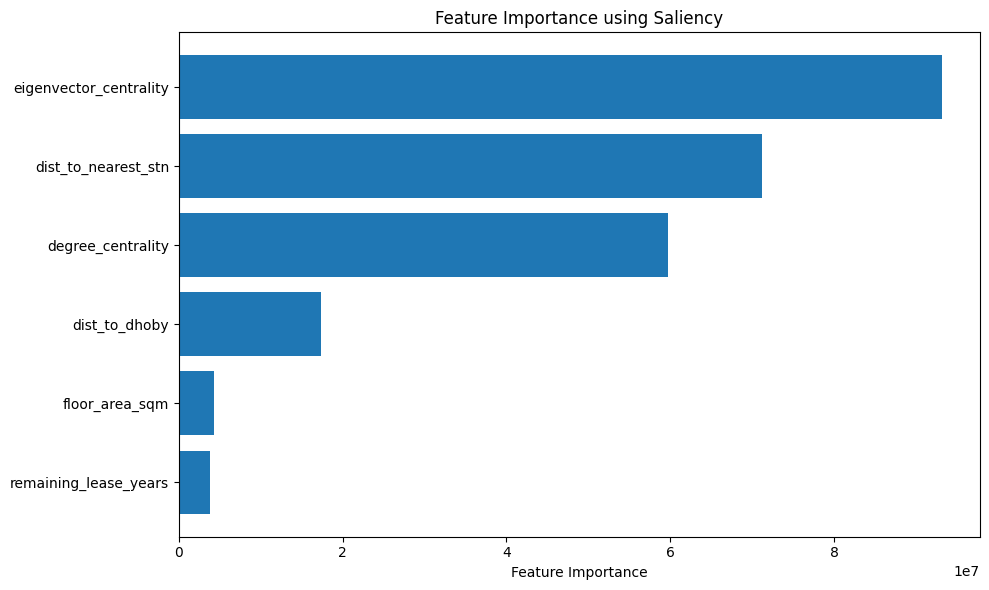

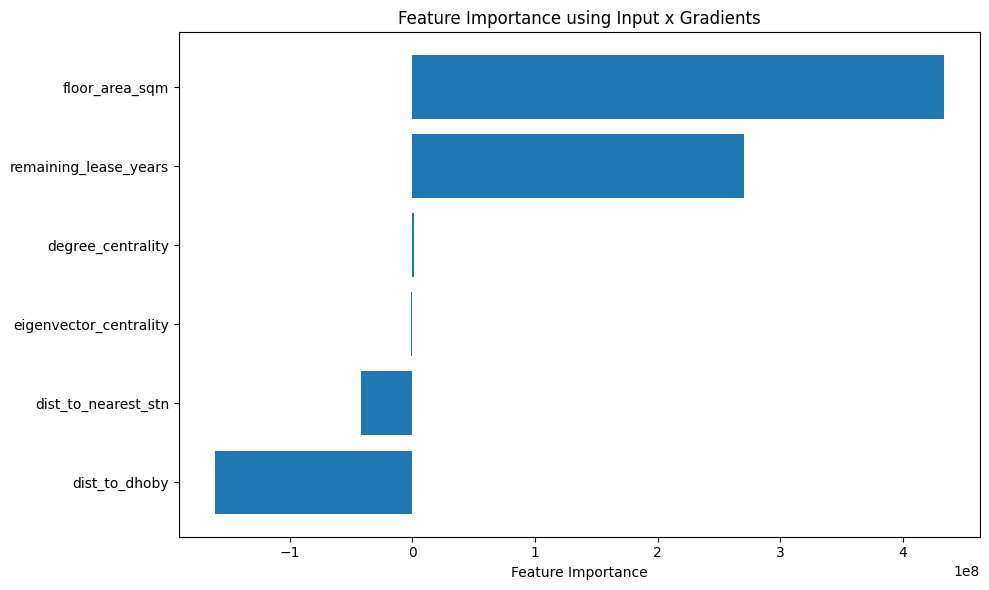

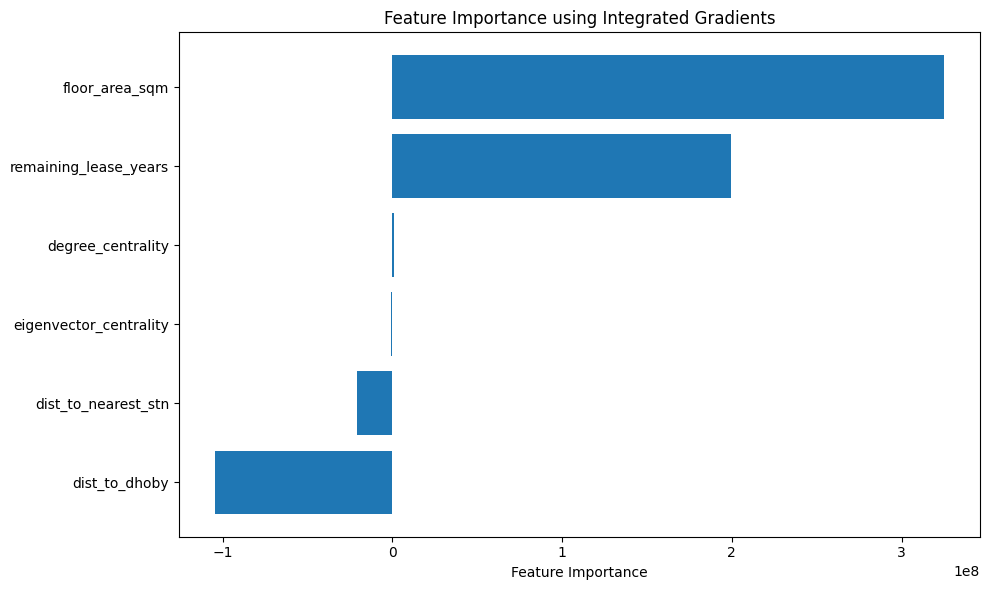

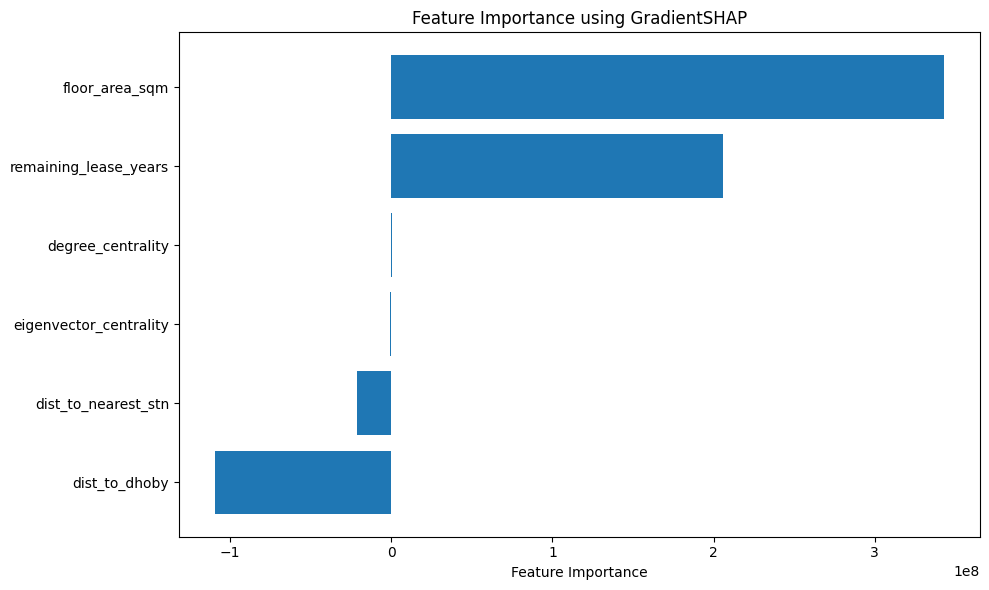

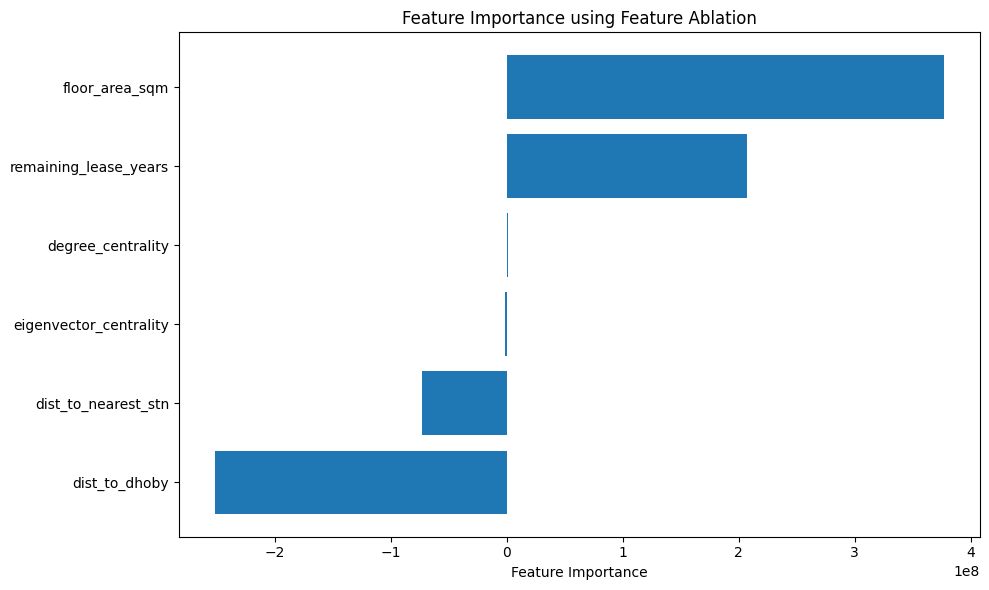

In [ ]:
import matplotlib.pyplot as plt

def plotAttributions(attributions, feature_names, method_name):
    # Summing the attributions across all data points to get an overall view
    attributions_sum = attributions.sum(dim=0).cpu().detach().numpy()

    # Sorting the features based on importance
    sorted_indices = attributions_sum.argsort()

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_names)), attributions_sum[sorted_indices])
    plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance using {method_name}')
    plt.tight_layout()
    plt.show()

# Assuming you have a list of feature names
feature_names = ['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality',
       'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']

# Visualize attributions for each method
plotAttributions(attr_saliency, feature_names, 'Saliency')
plotAttributions(attr_input_x_gradient, feature_names, 'Input x Gradients')
plotAttributions(attr_integrated_gradients, feature_names, 'Integrated Gradients')
plotAttributions(attr_gradient_shap, feature_names, 'GradientSHAP')
plotAttributions(attr_feature_ablation, feature_names, 'Feature Ablation')


> Train a separate model with the same configuration but now standardise the features via **StandardScaler** (fit to training set, then transform all). State your observations with respect to GradientShap and explain why it has occurred.
(Hint: Many gradient-based approaches depend on a baseline, which is an important choice to be made. Check the default baseline settings carefully.)


In [ ]:
from sklearn.preprocessing import StandardScaler

class CSVData_scaled(Dataset):
  def __init__(self, X, y):
    scaler = StandardScaler()
    self.features = scaler.fit_transform(X.to_numpy(dtype = np.float32))
    self.labels = y.to_numpy(dtype = np.float32)
    print(self.labels)


  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]


train_dataset = CSVData_scaled(X_train, y_train)
test_dataset = CSVData_scaled(X_test, y_test)


train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


[[232000.]
 [250000.]
 [262000.]
 ...
 [633000.]
 [788888.]
 [618000.]]
[[265000.]
 [470000.]
 [230000.]
 ...
 [638000.]
 [683500.]
 [670000.]]


In [ ]:
# TODO: Enter your code here
model = network(6)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()
model = train(model, 100)
model.eval()
test_model(model, test_dataloader, criterion)# Testing a model

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([25, 1])) that is different to the input size (torch.Size([25])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1]/[100] running accumulative loss across all batches: 430109274529792.000
Epoch [2]/[100] running accumulative loss across all batches: 365236554678272.000
Epoch [3]/[100] running accumulative loss across all batches: 194286566483968.000
Epoch [4]/[100] running accumulative loss across all batches: 88478492346368.000
Epoch [5]/[100] running accumulative loss across all batches: 64606300852224.000
Epoch [6]/[100] running accumulative loss across all batches: 54654519274496.000
Epoch [7]/[100] running accumulative loss across all batches: 50535513132032.000
Epoch [8]/[100] running accumulative loss across all batches: 49015825308160.000
Epoch [9]/[100] running accumulative loss across all batches: 48422655662080.000
Epoch [10]/[100] running accumulative loss across all batches: 48147083768320.000
Epoch [11]/[100] running accumulative loss across all batches: 48005950646784.000
Epoch [12]/[100] running accumulative loss across all batches: 47924152741376.000
Epoch [13]/[100] runni

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([17, 1])) that is different to the input size (torch.Size([17])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


23638844722.5679

In [ ]:
smaller_X_test = X_test[:1000]
smaller_X_test.shape

(1000, 6)

In [ ]:
saliency = Saliency(model)
input_x_gradient = InputXGradient(model)
integrated_gradients = IntegratedGradients(model)
gradient_shap = GradientShap(model)
feature_ablation = FeatureAblation(model)


input_data = torch.Tensor(smaller_X_test.to_numpy(dtype = np.float32))
baselines = torch.zeros_like(input_data)

attr_saliency = saliency.attribute(input_data)
attr_input_x_gradient = input_x_gradient.attribute(input_data)
attr_integrated_gradients = integrated_gradients.attribute(input_data, n_steps = 5)
attr_gradient_shap = gradient_shap.attribute(input_data, baselines=baselines)
attr_feature_ablation = feature_ablation.attribute(input_data)


/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


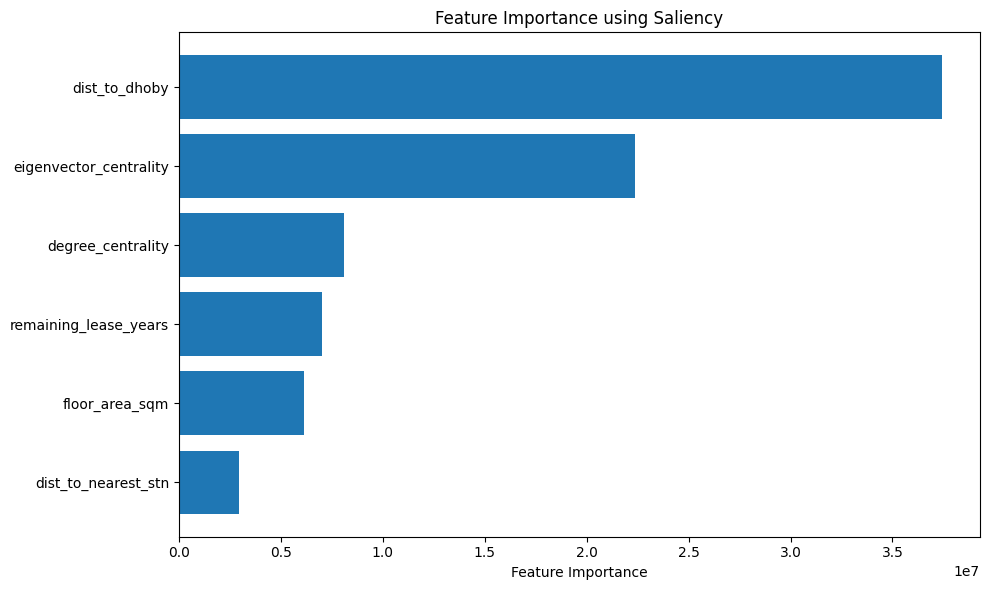

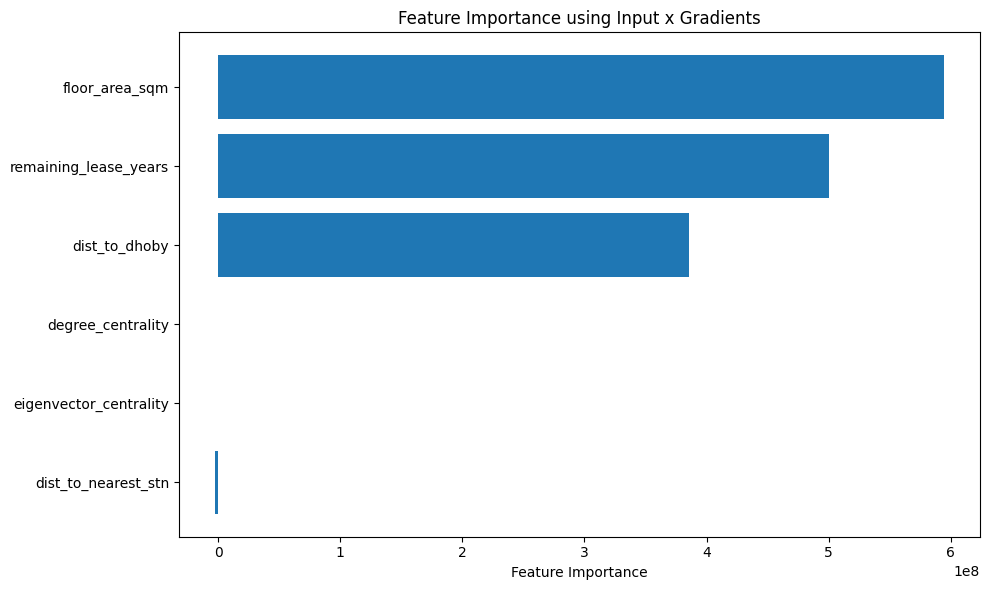

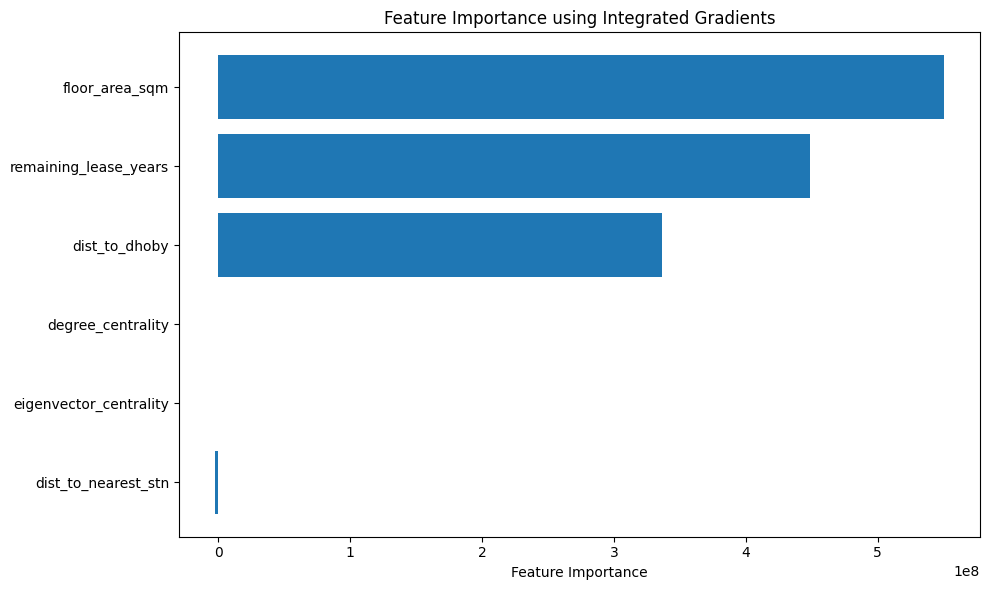

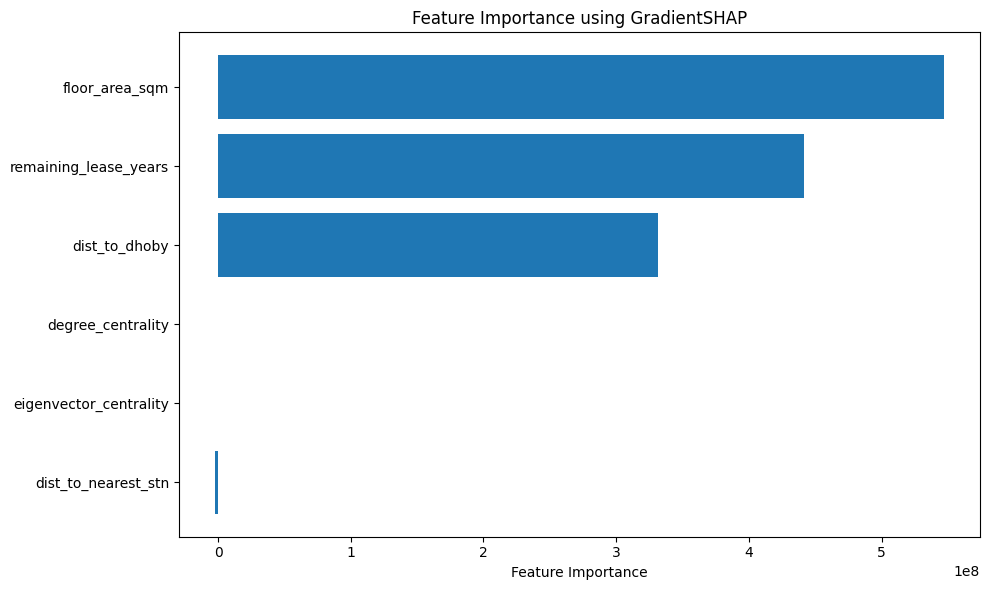

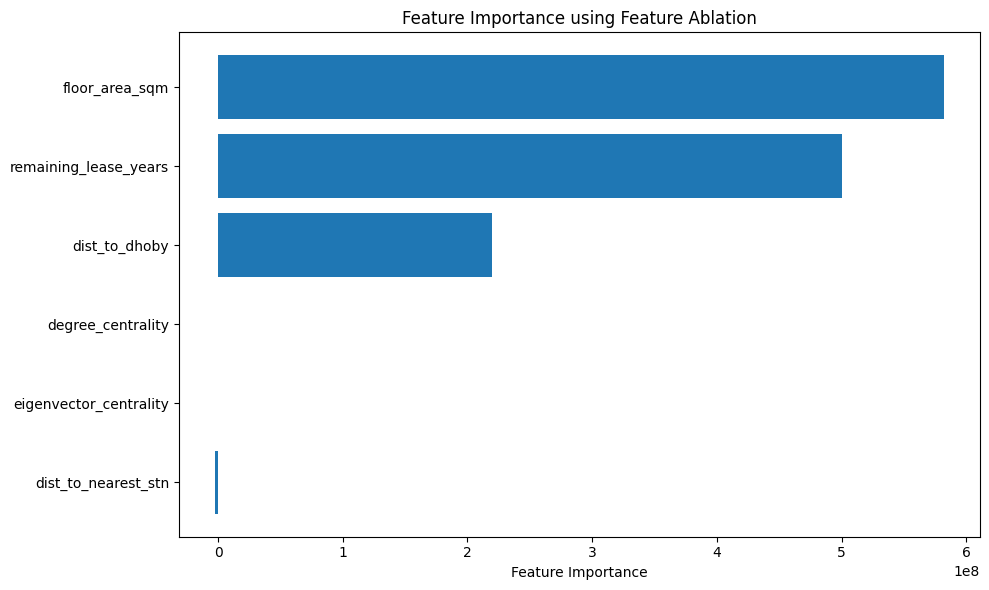

In [ ]:
plotAttributions(attr_saliency, feature_names, 'Saliency')
plotAttributions(attr_input_x_gradient, feature_names, 'Input x Gradients')
plotAttributions(attr_integrated_gradients, feature_names, 'Integrated Gradients')
plotAttributions(attr_gradient_shap, feature_names, 'GradientSHAP')
plotAttributions(attr_feature_ablation, feature_names, 'Feature Ablation')

Read https://distill.pub/2020/attribution-baselines/ to build up your understanding of Integrated Gradients (IG). Reading the sections before the section on ‘Game Theory and Missingness’ will be sufficient. Keep in mind that this article mainly focuses on classification problems. You might find the following [descriptions](https://captum.ai/docs/attribution_algorithms) and [comparisons](https://captum.ai/docs/algorithms_comparison_matrix) in Captum useful as well.


Then, answer the following questions in the context of our dataset:

> Why did Saliency produce scores similar to IG?


\# TODO: \
Saliency assessment involves measuring how the output gradient changes concerning the input gradient, while Integrated Gradients focuses on determining the average gradient along a direct path from the initial input to the final input. Consequently, these algorithms yield comparable outcomes in scenarios where the model is simple, and there exists a linear trajectory from the baseline input to the actual input.

> Why did Input x Gradients give the same attribution scores as IG?


\# TODO: \
This is because X-Gradient calculates the dot product of the input with the gradient of the outputs.
